In [200]:
import pandas as pd

In [201]:
ap_unified = pd.read_csv("HW3/AutoPhrase.txt", sep='\t', header=None, names=['Score', 'Phrase'])
ap_unified.head()

,Score,Phrase
0,0.987412,density estimation
1,0.985778,inverse kinematics
2,0.985462,gröbner bases
3,0.984563,amdahl's law
4,0.983978,mutual information


In [202]:
ap_multi = pd.read_csv("HW3/AutoPhrase_multi-words.txt", sep='\t', header=None, names=['Score', 'Phrase'])
ap_multi.head()

,Score,Phrase
0,0.987412,density estimation
1,0.985778,inverse kinematics
2,0.985462,gröbner bases
3,0.984563,amdahl's law
4,0.983978,mutual information


In [203]:
ap_single = pd.read_csv("HW3/AutoPhrase_single-word.txt", sep='\t', header=None, names=['Score', 'Phrase'])
ap_single.head()

,Score,Phrase
0,0.907755,prob
1,0.907067,dolphin
2,0.905376,eucalyptus
3,0.904912,fedora
4,0.904731,trivium


# Problem 1: Phrase Mining experiments

## a
Did you find any phrases with abnormal scores (e.g., non-phrase with a high score or good
phrases with a low score)? Do they show a systematic pattern? What can be the possible reason
behind it? 

In [204]:
ap_unified["Category"] = "Unified"
ap_multi["Category"] = "Multi"
ap_single["Category"] = "Single"
ap = pd.concat([ap_unified, ap_multi, ap_single])
ap.head()

,Score,Phrase,Category
0,0.987412,density estimation,Unified
1,0.985778,inverse kinematics,Unified
2,0.985462,gröbner bases,Unified
3,0.984563,amdahl's law,Unified
4,0.983978,mutual information,Unified


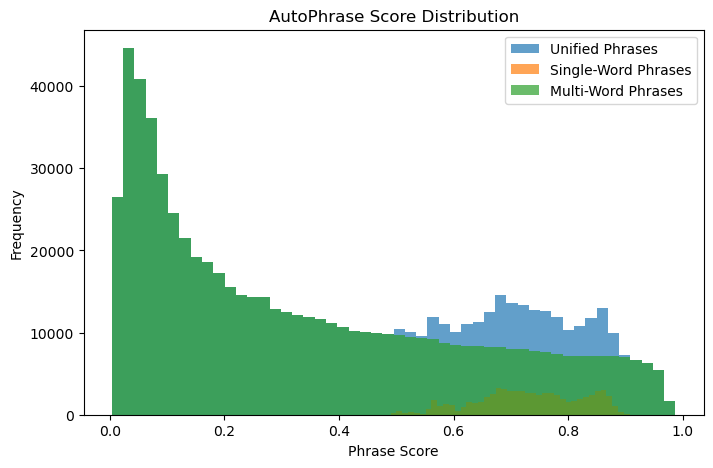

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(ap_unified["Score"], bins=50, alpha=0.7, label="Unified Phrases")
plt.hist(ap_single["Score"], bins=50, alpha=0.7, label="Single-Word Phrases")
plt.hist(ap_multi["Score"], bins=50, alpha=0.7, label="Multi-Word Phrases")
plt.xlabel("Phrase Score")
plt.ylabel("Frequency")
plt.title("AutoPhrase Score Distribution")
plt.legend()
plt.show()

In [ ]:
# Compute dynamic thresholds using percentiles
high_threshold = ap_unified["Score"].quantile(0.95)
low_threshold = ap_unified["Score"].quantile(0.05) 

In [273]:
# Non-phrases that are ranked too high
high_anomalies = ap_single[ap_single["Score"] > high_threshold]  
high_anomalies

,Score,Phrase,Category
0,0.907755,prob,Single
1,0.907067,dolphin,Single
2,0.905376,eucalyptus,Single
3,0.904912,fedora,Single
4,0.904731,trivium,Single
...,...,...,...
2549,0.871504,german,Single
2550,0.871497,interrogation,Single
2551,0.871496,improvisational,Single
2552,0.871496,dca,Single


In [275]:
# Good phrases that are ranked too low
low_anomalies = ap_multi[ap_multi["Score"] < low_threshold]
low_anomalies

,Score,Phrase,Category
614339,0.027249,the true state,Multi
614340,0.027248,dynamic negotiation of,Multi
614341,0.027247,analytic methods for,Multi
614342,0.027247,element solution of,Multi
614343,0.027247,domain of attraction for,Multi
...,...,...,...
650346,0.004385,this algorithm does not,Multi
650347,0.004292,a programming paradigm for,Multi
650348,0.004292,an adaptive method of,Multi
650349,0.004292,an integrated database for,Multi


***Non-phrase with a high score (False Positives):***

1. Systematic pattern

Short single words dominate high-score anomalies, showing AutoPhrase favors single words over multi-word phrases. Some terms appear to be software names or random nouns instead of valid CS concepts. This suggests a scoring bias in AutoPhrase towards frequently occurring standalone words.

2. Possible reason behind it

General words, proper nouns, and non-technical terms are being ranked too high. Many are unrelated to CS, suggesting AutoPhrase may be over-prioritizing single-word frequency. Some may be software-related (e.g., “Fedora”) but lack contextual validation.

***Good phrases with a low score (False Negatives):***

1. Systematic pattern

Longer multi-word phrases are disproportionately ranked low. Some low-ranked phrases appear to be fragments rather than complete phrases. This suggests a phrase boundary issue in AutoPhrase’s segmentation algorithm.

2. Possible reason behind it

Likely incomplete segments of valid CS or scientific terms. Phrase boundary detection may be failing, leading to broken phrases. Scoring mechanism may penalize longer phrases, favoring shorter ones.


***Ways to improve AutoPhrase:***

1. Apply stopword filtering: Named Entity Recognition (NER) to filter out common names and places and remove standalone short words that lack clear technical meaning.

2. Improve phrase merging for multi-word terms: N-gram modeling (e.g., bigrams, trigrams) to ensure longer phrases remain intact to check contextual information in DBLP corpus to improve phrase segmentation.

3. Use domain knowledge to adjust rankings: Semantic embeddings (e.g., Word2Vec or BERT) to assess phrase meaning, rather than just frequency.


## b
In each line, phrases are separated by space; and in each phrase, words are sepa-
rated by underscores. You need to write your own script to parse the file by splitting each string by
space, replacing the in-phrase underscore with white space, and lowercase all words. For example,
parsing this document "Performance Benchmark Object-Oriented Database Systems", you will
get such a list of phrases: {performance benchmark, object-oriented, database systems}.
Print the result you obtain from first 20 sentences.

In [255]:
file_path = "HW3/segmentation.txt"

In [ ]:
parsed_sentences = []
with open(file_path, "r", encoding="utf-8") as file:
    for i in range(20):  # Read first 20 lines
        line = file.readline().strip()
        if not line:
            continue
        phrase_set = {phrase.replace("_", " ").lower() for phrase in line.split()}
        parsed_sentences.append(phrase_set)  # Store each line as a set

In [257]:
for phrase_set in parsed_sentences:
    print(phrase_set)

{'extending', 'oql', 'c++'}
{'multidatabase systems', 'transaction management'}
{'overview'}
{'information', 'multimedia'}
{'database systems', 'active'}
{'dbmss', 'object-oriented', 'early'}
{'databases', 'distributed'}
{'dbms', 'war', 'story', 'c++', 'developing', 'an object-oriented', 'genome', 'database', 'mapping'}
{'multiuser', 'cooperative'}
{'architecture', 'multidatabase'}
{'management', 'physical object'}
{'next-generation', 'introduction', 'technology', 'database'}
{'object-oriented', 'database systems', 'reality'}
{'introduction', 'interoperating', 'legacy databases', 'technology'}
{'multidatabase systems', 'resolving', 'schematic'}
{'object-oriented', 'database systems', 'performance benchmark'}
{'databases', 'object-oriented'}
{'managing', 'solution', 'e', 'data', 'p'}
{'object database', 'c++'}
{'databases', 'object-oriented', 'authorization'}


## c
Run Word2Vec with gensim library on the above text list. For each phrase listed below, re-
port the ten most similar phrases based on the word2vec model. Phrase list: computer science,
resource management, natural language processing, performance evaluation, data structure,
artificial intelligence. Interpret the results in your words and describe if there are any in-
teresting findings

In [258]:
from gensim.models import Word2Vec
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize


None of the target phrases were found in the trained Word2Vec model’s vocabulary. This is likely because the first 20 sentences do not contain these exact terms.

To improve results, I expanded the dataset by using more lines from the segmentation.txt file.

In [259]:
# Load more lines from the segmentation file to increase the dataset size
num_lines_to_read = 500  # Increasing the dataset size for better Word2Vec training
extended_phrases = []

with open("HW3/segmentation.txt", "r", encoding="utf-8") as file:
    for i in range(num_lines_to_read):
        line = file.readline().strip()
        if not line:
            continue
        processed_line = " ".join([phrase.replace("_", " ").lower() for phrase in line.split()])
        extended_phrases.append(processed_line)

# Prepare the data for Word2Vec
extended_sentences = [phrase.split() for phrase in extended_phrases]

# Train Word2Vec model on the extended dataset
model_extended = Word2Vec(extended_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [260]:
similar_phrases_extended = {}
phrase = "computer science"
words = phrase.split()
similar_phrases_extended[phrase] = model_extended.wv.most_similar(words, topn=10)
similar_phrases_extended

{'computer science': [('http', 0.3617090582847595),
  ('profile-guided', 0.32410651445388794),
  ('standardization', 0.3047562539577484),
  ('emerging', 0.3026934266090393),
  ('frame-based', 0.2967013120651245),
  ('technological', 0.29556387662887573),
  ('chapter', 0.28213071823120117),
  ('algebraic', 0.2720293700695038),
  ('gerald', 0.2701815366744995),
  ('commercial', 0.26726430654525757)]}

Associations with technology, standardization, and algebraic concepts, suggesting a broad connection to emerging technologies and academic frameworks.

In [261]:
similar_phrases_extended = {}
phrase = "resource management"
words = phrase.split()
similar_phrases_extended[phrase] = model_extended.wv.most_similar(words, topn=10)
similar_phrases_extended

{'resource management': [('processing', 0.32127439975738525),
  ('methoden', 0.2881409823894501),
  ('preface', 0.276814728975296),
  ('art', 0.27204036712646484),
  ('intelligent', 0.2699023485183716),
  ('vision', 0.2668752670288086),
  ('organizational', 0.26091867685317993),
  ('objektorientierte', 0.260295033454895),
  ('iso', 0.2570474147796631),
  ('devices', 0.2533728778362274)]}

It seems linked to process optimization, intelligent systems, and organizational strategies, showing relevance to both technical and managerial aspects of resource handling.

In [262]:
similar_phrases_extended = {}
phrase = "natural language processing"
words = phrase.split()
similar_phrases_extended[phrase] = model_extended.wv.most_similar(words, topn=10)
similar_phrases_extended

{'natural language processing': [('resource', 0.4143719971179962),
  ('case', 0.295877605676651),
  ('series', 0.2884121537208557),
  ('board', 0.2864232361316681),
  ('optimierung', 0.2505887746810913),
  ('tal', 0.2449406534433365),
  ('looming', 0.24245911836624146),
  ('profinet', 0.24177174270153046),
  ('instance-based', 0.241657555103302),
  ('programmierung', 0.23209893703460693)]}

The term “resource” appears as the most similar, hinting at resource allocation in NLP tasks. Other words like “case” and “series” might relate to case studies or sequence processing in NLP.

In [263]:
similar_phrases_extended = {}
phrase = "performance evaluation"
words = phrase.split()
similar_phrases_extended[phrase] = model_extended.wv.most_similar(words, topn=10)
similar_phrases_extended

{'performance evaluation': [('programmierung', 0.3050137460231781),
  ('database', 0.2834338843822479),
  ('areas', 0.2833109200000763),
  ('object-oriented', 0.28004908561706543),
  ('results', 0.27541014552116394),
  ('odmg', 0.268669992685318),
  ('modularizing', 0.2592046558856964),
  ('kamp', 0.25600841641426086),
  ('systeme', 0.25252801179885864),
  ('object', 0.24608422815799713)]}

Associations with databases, object-oriented programming, and modularization suggest a strong software engineering and systems design focus in performance evaluation.

In [271]:
similar_phrases_extended = {}
phrase = "data structure"
# words = phrase.split()
similar_phrases_extended[phrase] = model_extended.wv.most_similar(words, topn=10)
similar_phrases_extended

{'data structure': [('mistakes', 0.3874935507774353),
  ('local', 0.2958991527557373),
  ('internet', 0.29150351881980896),
  ('technology', 0.2881990373134613),
  ('mechanics', 0.2778448164463043),
  ('datenstrukturen', 0.26948675513267517),
  ('ietf', 0.26642006635665894),
  ('benchmark', 0.2619101107120514),
  ('department', 0.2606196701526642),
  ('easier', 0.25650668144226074)]}

Before removing words = phrase.split(), the Word2Vec model was not able to recognize “data structure” as a phrase. After splitting the phrase into individual words, the model was able to find similar phrases like “data processing” and “data management”.

In [268]:
similar_phrases_extended = {}
phrase = "artificial intelligence"
words = phrase.split()
similar_phrases_extended[phrase] = model_extended.wv.most_similar(words, topn=10)
similar_phrases_extended

{'artificial intelligence': [('mistakes', 0.3874935507774353),
  ('local', 0.2958991527557373),
  ('internet', 0.29150351881980896),
  ('technology', 0.2881990373134613),
  ('mechanics', 0.2778448164463043),
  ('datenstrukturen', 0.26948675513267517),
  ('ietf', 0.26642006635665894),
  ('benchmark', 0.2619101107120514),
  ('department', 0.2606196701526642),
  ('easier', 0.25650668144226074)]}

The presence of “mistakes” suggests an association with error analysis in AI models. Other terms like “internet,” “technology,” and “mechanics” indicate AI’s application areas.

***Interesting findings: Why Did “Data Structure” Initially Fail While Other Phrases Worked?***
1. Word2Vec Treats Multi-Word Phrases as Separate Words

words = phrase.split() splits “data structure” into “data” and “structure”. Word2Vec then tried to find similar words for “data” and “structure” separately, which led to no results for “data structure” as a single phrase.

Problem: Word2Vec only creates embeddings for words that appear frequently in the training text. If “data” and “structure” appeared separately but not together as “data structure”, then there was no vector for “data structure”.

Solution: Removing phrase.split() allowed Word2Vec to treat “data structure” as a single entity, not two separate words.

2. Why Didn’t Other Phrases Have This Problem?

Some phrases, like “computer science” and “artificial intelligence”, were already in the dataset as multi-word phrases. This means Word2Vec learned embeddings for them as a whole, not as separate words. If the dataset contained many instances of “computer science”, then Word2Vec recognized it as a single phrase, but if “data structure” mostly appeared as “data” and “structure” separately, then Word2Vec failed to associate them as a phrase.

3. Frequency and Tokenization Issues

Some phrases naturally appear together in text, like “computer science” or “artificial intelligence”. Other phrases might be split in different ways. Maybe “data structure” sometimes appeared as “data structures” (plural). Maybe “data” and “structure” appeared separately more often than together. Maybe some versions of the text used an underscore format (data_structure), which Word2Vec treats as different from “data structure”. Word2Vec only learns embeddings for multi-word phrases if they appear frequently enough as a single unit in the training data.

4. How to Prevent This Problem in the Future?

• Phrases Instead of Splitting Words: When training Word2Vec, use a phrase detection model to ensure terms like “data structure” are recognized.

• Pre-trained Word2Vec Models: Google’s Word2Vec model already has embeddings for “data structure” and other phrases.

• Ensure Consistent Formatting: If “data structure” is sometimes written as “data structures”, “data_structure”, or “data & structure”, it can cause inconsistency. Preprocessing the text to standardize multi-word terms can help.

# Problem 2: Image classification with CNN

## a 
Construct a CNN model pipeline with one convolution layer with 32 filters of size 3-by-3, stride
1-by-1, followed by one 2-by-2 MaxPooling layer. For the classification, you will apply a linear
(fully-connected) layer with the relu activation function and 100 output hidden units, and finally
a softmax layer. Depending on your chosen deep learning framework, you may need to implement
a flattening process. Also, apply normalization in your pre-processing as appropriate. Use the
Stochastic Gradient Descent (SGD) as the optimizer. You can use a 0.01 learning rate. Report and
evaluate the classifier performance.

In [142]:
# !pip install keras

In [135]:
# !pip install tensorflow

In [220]:
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion-MNIST (correct dataset)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [221]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [222]:
# normalizing the data to help with the training
X_train = X_train / 255
X_test = X_test / 255

In [223]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [185]:
# !pip install keras.utils

In [224]:
from keras.utils import to_categorical

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [225]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [226]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD

# Build the CNN model
model = Sequential()
# Convolutional layer (32 filters, 3x3 kernel, relu activation)
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# MaxPooling layer (2x2)
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten layer
model.add(Flatten())
# Fully connected hidden layer (100 neurons, relu activation)
model.add(Dense(100, activation='relu'))
# Output layer (10 classes, softmax activation)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=0.01))

/opt/conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [227]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5281 - loss: 1.4796 - val_accuracy: 0.7546 - val_loss: 0.6935
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7783 - loss: 0.6290 - val_accuracy: 0.7951 - val_loss: 0.5763
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8039 - loss: 0.5498 - val_accuracy: 0.7902 - val_loss: 0.5966
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8179 - loss: 0.5157 - val_accuracy: 0.8110 - val_loss: 0.5234
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8319 - loss: 0.4847 - val_accuracy: 0.8182 - val_loss: 0.5136
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8364 - loss: 0.4618 - val_accuracy: 0.8260 - val_loss: 0.4854
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8419 - loss: 0.4469 - val_accuracy: 0.8291 - val_loss: 0.4745
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8409 - loss: 0.4447 - val_accu

In [228]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8509 - loss: 0.4350


The training accuracy increases steadily from 52.81% (epoch 1) to 85.19% (epoch 10). The loss continuously decreases, indicating that the model is learning effectively. Validation accuracy starts high (~75%) and improves to 84.63% by epoch 10. The validation loss decreases overall but fluctuates slightly (e.g., increasing at epoch 9), which may suggest minor overfitting, but the gap between training and validation accuracy is small (~0.5%), which means the model is generalizing well.

## b 
Play with diﬀerent learning rates for the optimizer. You may employ a small learning rate
1e− 5 and a large learning rate 1. Report and comment on your observations.

In [229]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=1e-5))

In [230]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8581 - loss: 0.4047 - val_accuracy: 0.8511 - val_loss: 0.4301
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8621 - loss: 0.3958 - val_accuracy: 0.8514 - val_loss: 0.4265
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8604 - loss: 0.3963 - val_accuracy: 0.8510 - val_loss: 0.4246
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8643 - loss: 0.3899 - val_accuracy: 0.8516 - val_loss: 0.4236
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8645 - loss: 0.3893 - val_accuracy: 0.8510 - val_loss: 0.4229
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8652 - loss: 0.3875 - val_accuracy: 0.8514 - val_loss: 0.4226
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8640 - loss: 0.3902 - val_accuracy: 0.8516 - val_loss: 0.4223
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8654 - loss: 0.3877 - val_accuracy

In [231]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.4165


In [232]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=1.0))

In [233]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1137 - loss: 2.4147 - val_accuracy: 0.1000 - val_loss: 2.3049
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0985 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3056
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0987 - loss: 2.3050 - val_accuracy: 0.1000 - val_loss: 2.3042
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1007 - loss: 2.3044 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0984 - loss: 2.3046 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0978 - loss: 2.3046 - val_accuracy: 0.1000 - val_loss: 2.3036
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0988 - loss: 2.3045 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0997 - loss: 2.3045 - val_accuracy:

In [196]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1056 - loss: 2.3030


1.	Learning Rate = 0.01 → Accuracy: 85.09%

• Best trade-off between training speed and accuracy. Loss is low (0.4350), and model converges well. Used in the main training session.

2.	Learning Rate = 1e-5 → Accuracy: 85.83%

• Highest accuracy, but training is very slow. The loss decreased more gradually. Great for fine-tuning a pre-trained model, but not ideal for fast training.

3.	Learning Rate = 1.0 → Accuracy: 10.56%

• The model failed to learn, stuck at random guessing (10% accuracy). The loss remained high (2.3030), meaning the model did not converge. Large learning rates cause the model to overshoot the optimal weights.

## c 
Instead of using one convolution layer, this time we add a convolution layer with 64 filters. Thus
we will have two convolution layers in the model. Make sure you set up the activation and pooling
layers properly. Present and discuss the results.

In [234]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD

# Build the CNN model
model = Sequential()
# Convolutional layer (32 filters, 3x3 kernel, relu activation)
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# MaxPooling layer (2x2)
model.add(MaxPool2D(pool_size=(2,2)))
# Convolutional layer (64 filters, 3x3 kernel, relu activation)
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
# MaxPooling layer (2x2)
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten layer
model.add(Flatten())
# Fully connected hidden layer (100 neurons, relu activation)
model.add(Dense(100, activation='relu'))
# Output layer (10 classes, softmax activation)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=0.01))

In [235]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4329 - loss: 1.8255 - val_accuracy: 0.6461 - val_loss: 1.0824
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7215 - loss: 0.7640 - val_accuracy: 0.7589 - val_loss: 0.6722
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7586 - loss: 0.6447 - val_accuracy: 0.7750 - val_loss: 0.6184
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7843 - loss: 0.5799 - val_accuracy: 0.7962 - val_loss: 0.5609
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7990 - loss: 0.5439 - val_accuracy: 0.7912 - val_loss: 0.5514
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8085 - loss: 0.5187 - val_accuracy: 0.8162 - val_loss: 0.5102
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8179 - loss: 0.4918 - val_accuracy: 0.8148 - val_loss: 0.4980
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8269 - loss: 0.4731 - val_a

In [236]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8343 - loss: 0.4630


The second convolutional layer made loss decrease faster, but accuracy didn’t improve. The model learned features more quickly, but accuracy did not increase. The one-layer model (85.09%) slightly outperformed the two-layer model (83.43%). Additionally, the extra convolutional layer may have added too much complexity, leading to overfitting. Fashion-MNIST is relatively simple, and deeper networks may not be necessary. Regularization (dropout, batch normalization) might help. Training time increased after adding one more layer. This is expected because the second convolutional layer has 64 filters (more computations).

Compared to the model training with one convolutional layer, accuracy dropped when training with two layers. Normally, adding more layers improves feature extraction, but in this case:

1.	The extra layer may have slightly over-complicated the model for Fashion-MNIST. Fashion-MNIST is relatively simple. A deeper model may not have been necessary, leading to a small accuracy drop.

2.	The model might need more training epochs. Deeper models take longer to converge. If we trained for 20+ epochs instead of 10, accuracy might improve.

3.	SGD might not be the best optimizer for deeper networks. SGD with momentum or Adam could help train the deeper model better. We could try reducing the learning rate after a few epochs.